In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
#tf.enable_eager_execution()

from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

import keras
import keras.backend
from keras import layers
from keras import models
import keras.utils

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
import time
import h5py
import sklearn
from sklearn.utils import shuffle

import os



/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


## Import data:
Using jetImages_signal.npz and jetImages_bkg.npz to train the neural network and using jetImages_signal_test.npz and jetImages_bkg_test.npz for testing.

In [3]:
data = np.load('/mnt/data/ml/ShowJetsDataTest.npz')
# !ls /mnt/data/ml/
images = data['jetImages']
labels = data['labels']

#for i in data.keys


#varlist = ['tau21', 'chMult']
#nVar = len(varlist)
#temp = np.zeros((nVar, labels.shape[0]))
#for n in range(nVar):
#   temp[n] = data[varlist[n]]
#var = np.vstack((temp))    
    
# old individually called variables

nVar = len(data) - 5 # excluding pt, eta, phi, images, and labels

tau21 = data['tau21']
chMult = data['chMult']
neutMult = data['neutMult']
phoMult = data['phoMult']
eleMult = data['eleMult']
muMult = data['muMult']

## data = stack all of them, then split them up after

print(chMult.shape)

grid = np.size(images, 1)
#ensure same number of signal vs. background and even split of z events
qcd_im = images[np.where(labels[:,0] == 1)]
qcd_tau = tau21[np.where(labels[:,0] == 1)]
qcd_mult = chMult[np.where(labels[:,0] == 1)]
qcd_neutMult = neutMult[np.where(labels[:,0] == 1)]
qcd_eleMult = eleMult[np.where(labels[:,0] == 1)]
qcd_phoMult = phoMult[np.where(labels[:,0] == 1)]
qcd_muMult = eleMult[np.where(labels[:,0] == 1)]

if len(qcd_im) % 3 != 0:
    qcd_im = qcd_im[:len(qcd_im)-(len(qcd_im) % 3)]
    qcd_tau = qcd_tau[:len(qcd_im)-(len(qcd_im) % 3)]
    qcd_mult = qcd_mult[:len(qcd_im)-(len(qcd_im) % 3)]
    qcd_neutMult = qcd_neutMult[:len(qcd_im)-(len(qcd_im) % 3)]
    qcd_phoMult = qcd_phoMult[:len(qcd_im)-(len(qcd_im) % 3)]
    qcd_eleMult = qcd_eleMult[:len(qcd_im)-(len(qcd_im) % 3)]
    qcd_muMult = qcd_muMult[:len(qcd_im)-(len(qcd_im) % 3)]

z1_im = images[np.where(labels[:,1] == 1)]
z1_im = z1_im[:int(len(qcd_im)/3)]
z1_tau = tau21[np.where(labels[:,1] == 1)]
z1_tau = z1_tau[:int(len(qcd_im)/3)]
z1_mult = chMult[np.where(labels[:,1] == 1)]
z1_mult = z1_mult[:int(len(qcd_im)/3)]
z1_neutMult = neutMult[np.where(labels[:,1] == 1)]
z1_neutMult = z1_neutMult[:int(len(qcd_im)/3)]
z1_phoMult = phoMult[np.where(labels[:,1] == 1)]
z1_phoMult = z1_phoMult[:int(len(qcd_im)/3)]
z1_eleMult = eleMult[np.where(labels[:,1] == 1)]
z1_eleMult = z1_eleMult[:int(len(qcd_im)/3)]
z1_muMult = muMult[np.where(labels[:,1] == 1)]
z1_muMult = z1_muMult[:int(len(qcd_im)/3)]

z2_im = images[np.where(labels[:,2] == 1)]
z2_im = z2_im[:int(len(qcd_im)/3)]
z2_tau = tau21[np.where(labels[:,2] == 1)]
z2_tau = z2_tau[:int(len(qcd_im)/3)]
z2_mult = chMult[np.where(labels[:,2] == 1)]
z2_mult = z2_mult[:int(len(qcd_im)/3)]
z2_neutMult = neutMult[np.where(labels[:,2] == 1)]
z2_neutMult = z2_neutMult[:int(len(qcd_im)/3)]
z2_phoMult = phoMult[np.where(labels[:,2] == 1)]
z2_phoMult = z2_phoMult[:int(len(qcd_im)/3)]
z2_eleMult = eleMult[np.where(labels[:,2] == 1)]
z2_eleMult = z2_eleMult[:int(len(qcd_im)/3)]
z2_muMult = muMult[np.where(labels[:,2] == 1)]
z2_muMult = z2_muMult[:int(len(qcd_im)/3)]

z3_im = images[np.where(labels[:,3] == 1)]
z3_im = z3_im[:int(len(qcd_im)/3)]
z3_tau = tau21[np.where(labels[:,3] == 1)]
z3_tau = z3_tau[:int(len(qcd_im)/3)]
z3_mult = chMult[np.where(labels[:,3] == 1)]
z3_mult = z3_mult[:int(len(qcd_im)/3)]
z3_neutMult = neutMult[np.where(labels[:,3] == 1)]
z3_neutMult = z3_neutMult[:int(len(qcd_im)/3)]
z3_phoMult = phoMult[np.where(labels[:,3] == 1)]
z3_phoMult = z3_phoMult[:int(len(qcd_im)/3)]
z3_eleMult = eleMult[np.where(labels[:,3] == 1)]
z3_eleMult = z3_eleMult[:int(len(qcd_im)/3)]
z3_muMult = muMult[np.where(labels[:,3] == 1)]
z3_muMult = z3_muMult[:int(len(qcd_im)/3)]

qcd_lab = np.zeros([len(qcd_im), 2])
qcd_lab[:,0] = 1
z_lab = np.zeros([len(qcd_im), 2])
z_lab[:,1] = 1
images = np.vstack((qcd_im, z1_im, z2_im, z3_im))
taus = np.hstack((qcd_tau, z1_tau, z2_tau, z3_tau))
mults = np.hstack((qcd_mult, z1_mult, z2_mult, z3_mult))
neutMults = np.hstack((qcd_neutMult, z1_neutMult, z2_neutMult, z3_neutMult))
phoMults = np.hstack((qcd_phoMult, z1_phoMult, z2_phoMult, z3_phoMult))
eleMults = np.hstack((qcd_eleMult, z1_eleMult, z2_eleMult, z3_eleMult))
muMults = np.hstack((qcd_muMult, z1_muMult, z2_muMult, z3_muMult))


labels = np.vstack((qcd_lab, z_lab))
n_data = len(images)
images = images.reshape(n_data, grid, grid, 1)

#split data into testing/training/validation

testimages = images[::4]
testlabels = labels[::4]
testtaus = taus[::4]
testmults = mults[::4]
testNeutMults = neutMults[::4]
testPhoMults = phoMults[::4]
testEleMults = eleMults[::4]
testMuMults = muMults[::4]

mask_im = np.ones(images.shape,dtype=bool)
mask_im[::4] = 0
mask_im[1::8] = 0
mask_lab = np.ones(labels.shape,dtype=bool)
mask_lab[::4] = 0
mask_lab[1::8] = 0

mask_tau = np.ones(taus.shape,dtype=bool)
mask_tau[::4] = 0
mask_tau[1::8] = 0
mask_mult = np.ones(mults.shape,dtype=bool)
mask_mult[::4] = 0
mask_mult[1::8] = 0
mask_neutMult = np.ones(neutMults.shape,dtype=bool)
mask_neutMult[::4] = 0
mask_neutMult[1::8] = 0
mask_phoMult = np.ones(phoMults.shape,dtype=bool)
mask_phoMult[::4] = 0
mask_phoMult[1::8] = 0
mask_eleMult = np.ones(eleMults.shape,dtype=bool)
mask_eleMult[::4] = 0
mask_eleMult[1::8] = 0
mask_muMult = np.ones(muMults.shape,dtype=bool)
mask_muMult[::4] = 0
mask_muMult[1::8] = 0

valimages = images[1::8]
vallabels = labels[1::8]
valtaus = taus[1::8]
valmults = mults[1::8]
valNeutMults = neutMults[1::8]
valPhoMults = phoMults[1::8]
valEleMults = eleMults[1::8]
valMuMults = muMults[1::8]

trainimages = images[mask_im].reshape((n_data-len(testimages)-len(valimages)), grid, grid, 1)
trainlabels = labels[mask_lab].reshape((n_data-len(testimages)-len(valimages)), 2)
traintaus = taus[mask_tau].reshape((n_data-len(testimages)-len(valimages)), 1)
trainmults = mults[mask_mult].reshape((n_data-len(testimages)-len(valimages)), 1)
trainNeutMults = neutMults[mask_neutMult].reshape((n_data-len(testimages)-len(valimages)), 1)
trainPhoMults = phoMults[mask_phoMult].reshape((n_data-len(testimages)-len(valimages)), 1)
trainEleMults = eleMults[mask_eleMult].reshape((n_data-len(testimages)-len(valimages)), 1)
trainMuMults = muMults[mask_muMult].reshape((n_data-len(testimages)-len(valimages)), 1)

print(trainimages.shape)
print(trainlabels.shape)
print(traintaus.shape)
print(trainmults.shape)
print(trainNeutMults.shape)
print(trainPhoMults.shape)
print(trainEleMults.shape)
print(trainMuMults.shape)
print()
print(valimages.shape)
print(vallabels.shape)
print(valtaus.shape)
print(valmults.shape)
print(valNeutMults.shape)
print(valPhoMults.shape)
print(valEleMults.shape)
print(valMuMults.shape)
print()
print(testimages.shape)
print(testlabels.shape)
print(testtaus.shape)
print(testmults.shape)
print(testNeutMults.shape)
print(testPhoMults.shape)
print(testEleMults.shape)
print(testMuMults.shape)


print()
print(phoMult)


(336227,)
(62025, 16, 16, 1)
(62025, 2)
(62025, 1)
(62025, 1)
(62025, 1)
(62025, 1)
(62025, 1)
(62025, 1)

(12405, 16, 16, 1)
(12405, 2)
(12405,)
(12405,)
(12405,)
(12405,)
(12405,)
(12405,)

(24810, 16, 16, 1)
(24810, 2)
(24810,)
(24810,)
(24810,)
(24810,)
(24810,)
(24810,)

[ 4. 10. 31. ... 15. 10. 10.]


In [3]:
# nVar = 5
# variables= []
# print(variables)
# for i in data:
#     temp = {"name":str(i),
#            "data":data[str(i)]}
#     variables.append(temp)

# #print(variables.get('tau21')

    

In [4]:
### trying to make adding variable easier ###

# data = np.load('/mnt/data/ml/ShowJetsDataTest.npz')
# varlist = ['tau21', 'chMult']
# nVar = len(varlist)
# temp = np.zeros((nVar, labels.shape[0]))
# for n in range(nVar):
#     temp[n] = data[varlist[n]]
    

# var = np.vstack((temp))
# qcd_var = var[:, np.where(labels[:,0] == 1)]

# #print(np.where(labels[:,0] == 1))
# arg = np.where(labels[:,0] == 1)
# print(arg)
# print(qcd_tau)
# print(var[:,286606])
# print(var.shape)
# print(labels.shape)


Print a plot of data to see what it looks like!

Preprocessing -> spit data into training and testing; take 80% for training and 20% for testing.

If using CNN, uncomment ".reshape(n_data, grid, grid, 1)".

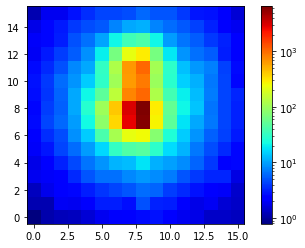

In [6]:
#plot input signal and background
sig_trainimages = np.zeros_like(trainimages[1])
bkg_trainimages = np.zeros_like(trainimages[1])
for i in range(len(trainimages)):
    if trainlabels[i,0] == 1:
        sig_trainimages += trainimages[i]
    else:
        bkg_trainimages += trainimages[i]
#signal
display_sig = sig_trainimages.reshape(grid,grid)
plt.grid(False)
plt.imshow(display_sig, interpolation='nearest', origin='low', cmap = 'jet', norm=LogNorm())
plt.colorbar()
plt.show()

Build DNN:

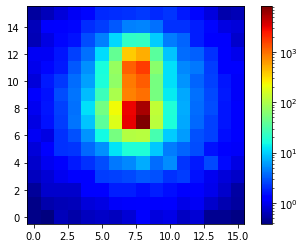

In [7]:
#background
display_bkg = bkg_trainimages.reshape(grid,grid)
plt.grid(False)
plt.imshow(display_bkg, interpolation='nearest', origin='low', cmap = 'jet', norm=LogNorm())
plt.colorbar()
plt.show()

In [8]:
import tensorflow as tf

def build_model(n):
    input1 = layers.Input(shape = (grid, grid, 1))
    x = layers.Conv2D(64, (12, 12), activation='relu', padding = 'same')(input1)
    x = layers.Conv2D(64, (6, 6), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(64, (4, 4), activation='relu', padding = 'same')(x)
    x = layers.MaxPool2D((2, 2))(x)
    x1 = layers.Flatten()(x)
    inpts = []
    for i in range(n):
        inpt = layers.Input(shape=(1,))
        inpts.append(inpt)
    #input2 = layers.Input(shape=(1,))
    #input3 = layers.Input(shape=(1,))
    x = layers.concatenate(inputs = [x1]+inpts, axis=-1)
    x = layers.Dense(256, activation=tf.nn.relu)(x)
    output = layers.Dense(2, activation=tf.nn.sigmoid)(x)
    model = models.Model(inputs=[input1]+inpts, outputs=output)
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['categorical_crossentropy', 'accuracy'])
    return model

Initialize model:

In [8]:
#circleCNN = build_model()

Test model's prediction $before$ training:

In [10]:
example_batch = trainimages[::300]
example_labels = trainlabels[::300]
example_taus = traintaus[::300]
example_mults = trainmults[::300]
example_neutMults = trainNeutMults[::300]
example_phoMults = trainPhoMults[::300]
example_eleMults = trainEleMults[::300]
example_muMults = trainMuMults[::300]

print(example_batch.shape)
print(example_mults.shape)
print(example_neutMults.shape)
print(example_muMults.shape)
print(example_labels.shape)

example_variables = [example_batch, 
                     example_taus,
                     example_mults,
                     #example_neutMults,
                     example_phoMults,
                     #example_eleMults,
                     #example_muMults
                    ]
                             
train_variables = [trainimages,
                   traintaus,
                   trainmults,
                   #trainNeutMults,
                   trainPhoMults,
                   #trainEleMults,
                   #trainMuMults
                  ]

test_variables = [testimages, 
                   testtaus,
                   testmults,
                   #testNeutMults,
                   testPhoMults,
                   #testEleMults,
                   #testMuMults
                  ]




(207, 16, 16, 1)
(207, 1)
(207, 1)
(207, 1)
(207, 2)


In [ ]:
circleCNN = build_model( len(example_variables)-1 )

In [10]:
example_result = circleCNN.predict(x = example_variables)
results = circleCNN.evaluate(x = example_variables, y = example_labels)
print(example_result)
#print(results)

207/207 [==============================] - 0s 2ms/step
[[0.6405052  0.35398886]
 [0.66938496 0.31652665]
 [0.54673755 0.44581476]
 [0.5459957  0.45093584]
 [0.66049504 0.3731526 ]
 [0.6663851  0.3336742 ]
 [0.61218286 0.3972537 ]
 [0.52666456 0.47531846]
 [0.61258054 0.38075   ]
 [0.5559122  0.43691018]
 [0.6253564  0.37010163]
 [0.5787393  0.40400934]
 [0.62416995 0.36762798]
 [0.6285988  0.3491038 ]
 [0.625602   0.41451514]
 [0.57119274 0.41982502]
 [0.5784844  0.42695594]
 [0.6040486  0.3954906 ]
 [0.59606016 0.40379763]
 [0.5882752  0.41803628]
 [0.6772751  0.31828114]
 [0.595602   0.403244  ]
 [0.6179228  0.39137667]
 [0.62839055 0.35637158]
 [0.60307866 0.40532714]
 [0.6044769  0.374425  ]
 [0.6425757  0.41218147]
 [0.5598288  0.4287566 ]
 [0.6308412  0.37415355]
 [0.65054196 0.35563058]
 [0.5492206  0.44547394]
 [0.6538485  0.3637206 ]
 [0.5746485  0.44202325]
 [0.67647326 0.31937164]
 [0.66935915 0.30294514]
 [0.69728744 0.29804665]
 [0.5338525  0.4576175 ]
 [0.7190838  0.25040

Now train! (warning: if building CNN, computer tends to get loud)

In [11]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')
    
checkpoint_path = "model/CNN_cat_multi_input.h5"
if not os.path.exists("model"):
    os.mkdir("model")

# Create checkpoint callback
# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
#                                                  save_best_only=True,
#                                                  verbose=1)
model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', 
                                   verbose=1, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)    
EPOCHS = 50
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = circleCNN.fit(
  train_variables, trainlabels,
  epochs=EPOCHS, validation_split = 0.2, verbose = 0,
  callbacks=[early_stop, model_checkpoint])

Instructions for updating:
Use tf.cast instead.

Epoch 00001: val_loss improved from inf to 1.02736, saving model to model/CNN_cat_multi_input.h5

Epoch 00002: val_loss improved from 1.02736 to 0.61896, saving model to model/CNN_cat_multi_input.h5

Epoch 00003: val_loss improved from 0.61896 to 0.56551, saving model to model/CNN_cat_multi_input.h5

Epoch 00004: val_loss improved from 0.56551 to 0.54164, saving model to model/CNN_cat_multi_input.h5

Epoch 00005: val_loss did not improve from 0.54164

Epoch 00006: val_loss did not improve from 0.54164

Epoch 00007: val_loss did not improve from 0.54164

Epoch 00008: val_loss did not improve from 0.54164

Epoch 00009: val_loss did not improve from 0.54164

Epoch 00010: val_loss improved from 0.54164 to 0.46780, saving model to model/CNN_cat_multi_input.h5

Epoch 00011: val_loss did not improve from 0.46780

Epoch 00012: val_loss did not improve from 0.46780

Epoch 00013: val_loss did not improve from 0.46780

Epoch 00014: val_loss did not

In [16]:
#dataset_shuffled = dataset.shuffle(buffer_size=1024).batch(16)

In [ ]:
# # WITH BATCHING AND SHUFFLING



# EPOCHS = 1
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# history = circleCNN.fit(
#   dataset_shuffled,
#   epochs=EPOCHS)

Now make a plot that shows the pregression of accuracy through each training epoch.

In [ ]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch
    
#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error')
#     plt.plot(hist['epoch'], hist['mean_squared_error'],
#              label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mean_squared_error'],
#              label = 'Val Error')
#     plt.ylim([0,100])
#     plt.legend()
#     plt.show()

# plot_history(history)

Load best weights.

In [11]:
!ls model
best_model = keras.models.load_model('model/CNN_cat_multi_input.h5')
best_model.summary()
results = best_model.evaluate(test_variables, testlabels)
print(results)

CNN_cat_multi_7inputs.h5	CNN_cat_multi_input_5E.h5    CNN_sparce_cat.h5
CNN_cat_multi_input_3inputs.h5	CNN_cat_multi_input.h5	     RNN.h5
CNN_cat_multi_input_4inputs.h5	CNN_cat_multi_input_taus.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16, 16, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 64)   9280        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 64)   147520      conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (C

Evaluate the performance of our DNN! Plot predictions vs. true values (the line is predictions vs. predicitons).

(24810,)
(24810, 16, 16, 1)
(24810, 2)


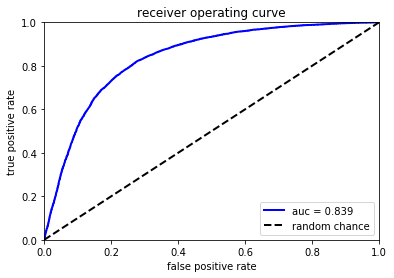

In [13]:
# Plot ROC

print(testtaus.shape)
print(testimages.shape)
print(testlabels.shape)

#predict = best_model.predict([testimages, testtaus, testmults])
predict = best_model.predict(test_variables)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(testlabels[:,0], predict[:,0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, color='b', label='auc = %.3f' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
print(testlabels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


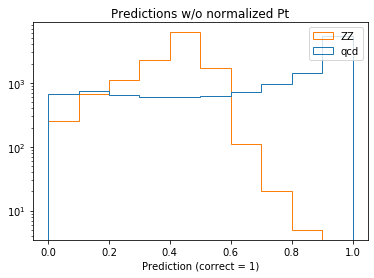

In [14]:
indqcd = np.argwhere(testlabels[:,1] == 0)
ind1  = np.where(testlabels[:,1] == 1) 
#ind2  = np.where(testlabels[:,2] == 1)
#ind3  = np.where(testlabels[:,3] == 1)
hist_, bin_edges_ = np.histogram(predict[indqcd])
plt.hist([predict[indqcd, 0].flatten(),predict[ind1, 1].flatten()] , histtype = 'step', label = ['qcd', 'ZZ'])
plt.legend()
plt.title('Predictions w/o normalized Pt')
plt.yscale('log')
plt.xlabel('Prediction (correct = 1)')
plt.show()

$$ \textbf{LRP} $$

In [ ]:
# import innvestigate
# import innvestigate.utils as iutils

In [ ]:
# # Creating an analyzer
# lrp_analyzer = innvestigate.create_analyzer("lrp.z", best_model)
# #discoverered that innvestigate fails to run on a loaded model --> trying to find fix

# # Applying the analyzer
# display = trainimages[1].reshape(1,grid,grid,1) #the reshape is this way is because the input is expected to be 4 dimensions
# analysis = lrp_analyzer.analyze(display)

# # Displaying one result
# plt.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
# plt.colorbar()
# plt.show()

In [ ]:
# #fix - change to predicted labels
# #plot output signal and background
# sig_analysis_true = np.zeros_like(analysis)
# bkg_analysis_true = np.zeros_like(analysis)
# sig_analysis_pred = np.zeros_like(analysis)
# bkg_analysis_pred = np.zeros_like(analysis)
# # sig_mask = trainlabels == 1
# # bkg_mask = trainlabels == 0
# # pred_sig_mask = predict >= 0.50
# # pred_bkg_mask = predict < 0.50

# toc = time.time()

# for i in range(len(trainimages)):
#     display = trainimages[i].reshape(1,grid,grid,1)
#     analysis = lrp_analyzer.analyze(display)
#     if trainlabels[i] == 1:
#         sig_analysis_true += analysis  
#     else:
#         bkg_analysis_true += analysis

# for i in range(len(trainimages)):
#     display = trainimages[i].reshape(1,grid,grid,1)
#     analysis = lrp_analyzer.analyze(display)
#     if trainlabels[i] >= 0.50:
#         sig_analysis_pred += analysis  
#     else:
#         bkg_analysis_pred += analysis

# tic = time.time()

# print('/n time = /n', tic-toc)


In [ ]:
# Displaying the signal result
# ax = plt.figure(figsize = (10,10))
# ax.add_subplot(121)
# im = plt.imshow(sig_analysis_true.squeeze(), cmap='seismic', interpolation='nearest')
# plt.colorbar(im,fraction=0.046, pad=0.04)
# ax.add_subplot(122)
# im_ = plt.imshow(sig_analysis_pred.squeeze(), cmap='seismic', interpolation='nearest')
# plt.colorbar(im_,fraction=0.046, pad=0.04)

In [ ]:
# # Displaying the signal result
# ax = plt.figure(figsize = (10,10))
# plt.subplot(121)
# im_ = plt.imshow(bkg_analysis_true.squeeze(), cmap='seismic', interpolation='nearest')
# plt.colorbar(im_,fraction=0.046, pad=0.04)
# plt.subplot(122)
# im = plt.imshow(bkg_analysis_pred.squeeze(), cmap='seismic', interpolation='nearest')
# plt.colorbar(im,fraction=0.046, pad=0.04)